In [1]:
%load_ext autoreload
%load_ext autotime

time: 151 µs (started: 2024-01-28 20:31:05 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

time: 955 ms (started: 2024-01-28 20:31:05 -08:00)


In [3]:
import dask.dataframe as dd
import numpy as np
import pandas as pd


time: 723 ms (started: 2024-01-28 20:31:06 -08:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_mummi_wemul_32_32/_parquet'

time: 456 µs (started: 2024-01-28 20:31:07 -08:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-wemul'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/recorder_mummi_wemul_32_32',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_mummi_wemul_32_32',
    debug=False,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [20:31:08] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:100]


'http://127.0.0.1:33271/status'

time: 2.87 s (started: 2024-01-28 20:31:07 -08:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    slope_threshold=45,
    # view_types=['proc_name'],
)

[INFO] [20:31:14] Read traces (0.16815257212147117) [/g/g91/izzet/projects/wisio/wisio/recorder.py:71]
[INFO] [20:31:14] Compute high-level metrics (0.5484857219271362) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:133]
[INFO] [20:31:15] Compute main view (0.5995005471631885) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:146]
[INFO] [20:31:15] Compute metric boundaries (0.00024960399605333805) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:161]
[INFO] [20:31:21] Compute perspectives (2.5046784630976617) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:185]
[INFO] [20:31:23] Detect I/O bottlenecks (0.35210524010472) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:199]
[INFO] [20:32:07] Attach reasons to I/O bottlenecks (8.045041727134958) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:212]


time: 53.5 s (started: 2024-01-28 20:31:13 -08:00)


In [7]:
ed = [bot.extra_data
      for rule in result.bottlenecks
      for metric in result.bottlenecks[rule]
      for view_key in [('file_name',), ('proc_name',), ('time_range',)] # result.bottlenecks[rule][metric]
      for bot in result.bottlenecks[rule][metric][view_key]]
len(ed)

3

time: 2.96 ms (started: 2024-01-28 20:32:11 -08:00)


In [8]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             3718.62 seconds                                                                           │
│  I/O Time             9271.35 seconds                                                                           │
│                       ├── Read - 52.08 seconds (0.56%)                                                          │
│                       ├── Write - 3978.18 seconds (42.91%)                                                      │
│                       └── Metadata - 5718.31 seconds (61.68%)                                                   │
│  I/O Ops              38,395,373 ops                                                                            │
│                       ├── Read - 13,843,105 ops (36.05%)                                                        │
│                       ├── Write - 7,126,536 ops (18.56%)                                                        │
│                       └── Metadata - 17,425,732 ops (45.38%)                                                    │
│  I/O Size             6.67 TiB                                                                                  │
│                       ├── Read - 6.54 TiB (98.04%)                                                              │
│                       └── Write - 133.65 GiB (1.96%)                                                            │
│  Read Xfer            4 kiB-4 MiB - 80 ops                                                                      │
│                       ├── 256 kiB-1 MiB - 2 ops (2.50%)                                                         │
│                       └── 1-4 MiB - 78 ops (97.50%)                                                             │
│  Write Xfer           4 kiB-1 MiB - 80 ops                                                                      │
│                       ├── <4 kiB - 2 ops (2.50%)                                                                │
│                       └── 256 kiB-1 MiB - 78 ops (97.50%)                                                       │
│  Node(s)              2 node(s)                                                                                 │
│                       ├── lassen83 - 9271.35 s (100.00%) - 6.51 TiB/78.80 GiB R/W (97.69/1.15%) - 37,972,826    │
│                       │   ops (98.90%)                                                                          │
│                       └── lassen736 - 3689.26 s (39.79%) - 24.38 GiB/54.84 GiB R/W (0.36/0.80%) - 422,547 ops   │
│                           (1.10%)                                                                               │
│  App(s)               1 app(s)                                                                                  │
│                       └── wemul - 9271.35 s (100.00%) - 6.54 TiB/133.65 GiB R/W (98.04/1.96%) - 38,395,373 ops  │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  80 process(es)/rank(s)                                                                    │
│  Files                0 files                                                                                   │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       0 time period(s) (Time granularity: 10000000.0)                                           │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           1.90                                                                                      │
╰───────────────────────────────────────────────────────

time: 444 ms (started: 2024-01-28 16:24:02 -08:00)


In [132]:
result.output.console(show_debug=True, max_bottlenecks_per_view_type=15)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             3718.62 seconds                                                                           │
│  I/O Time             9271.35 seconds                                                                           │
│                       ├── Read - 52.08 seconds (0.56%)                                                          │
│                       ├── Write - 3978.18 seconds (42.91%)                                                      │
│                       └── Metadata - 5718.31 seconds (61.68%)                                                   │
│  I/O Ops              38,395,373 ops                                                                            │
│                       ├── Read - 13,843,105 ops (36.05%)                                                        │
│                       ├── Write - 7,126,536 ops (18.56%)                                                        │
│                       └── Metadata - 17,425,732 ops (45.38%)                                                    │
│  I/O Size             6.67 TiB                                                                                  │
│                       ├── Read - 6.54 TiB (98.04%)                                                              │
│                       └── Write - 133.65 GiB (1.96%)                                                            │
│  Read Xfer            4 kiB-4 MiB - 80 ops                                                                      │
│                       ├── 256 kiB-1 MiB - 2 ops (2.50%)                                                         │
│                       └── 1-4 MiB - 78 ops (97.50%)                                                             │
│  Write Xfer           4 kiB-1 MiB - 80 ops                                                                      │
│                       ├── <4 kiB - 2 ops (2.50%)                                                                │
│                       └── 256 kiB-1 MiB - 78 ops (97.50%)                                                       │
│  Node(s)              2 node(s)                                                                                 │
│                       ├── lassen83 - 9271.35 s (100.00%) - 6.51 TiB/78.80 GiB R/W (97.69/1.15%) - 37,972,826    │
│                       │   ops (98.90%)                                                                          │
│                       └── lassen736 - 3689.26 s (39.79%) - 24.38 GiB/54.84 GiB R/W (0.36/0.80%) - 422,547 ops   │
│                           (1.10%)                                                                               │
│  App(s)               1 app(s)                                                                                  │
│                       └── wemul - 9271.35 s (100.00%) - 6.54 TiB/133.65 GiB R/W (98.04/1.96%) - 38,395,373 ops  │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  80 process(es)/rank(s)                                                                    │
│  Files                0 files                                                                                   │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       0 time period(s) (Time granularity: 10000000.0)                                           │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           1.90                                                                                      │
╰───────────────────────────────────────────────────────

time: 320 ms (started: 2024-01-28 20:00:55 -08:00)


In [121]:
ed = [bot.extra_data
      for rule in result.bottlenecks
      for metric in result.bottlenecks[rule]
      for view_key in result.bottlenecks[rule][metric]
      for bot in result.bottlenecks[rule][metric][view_key]]
ed

[{'time': 9271.347712736482,
  'count': 1309418,
  'size_min': 4112,
  'size_max': 2101248,
  'size': 251533131840,
  'read_time': 49.40728360042925,
  'write_time': 3978.1764322005974,
  'metadata_time': 5243.763996935455,
  'read_size': 248133826592,
  'write_size': 3399305248,
  'metadata_size': 0,
  'read_count': 476520,
  'write_count': 243116,
  'metadata_count': 589782,
  'read_min': 4104,
  'read_max': 1052672,
  'write_min': 8,
  'write_max': 1048576,
  'metadata_min': 0,
  'metadata_max': 0,
  'data_count': 719636,
  'data_size': 251533131840,
  'data_time': 4027.5837158010268,
  'sequential_time': 4027.5837158010268,
  'random_time': 0.0,
  'sequential_size': 251533131840,
  'random_size': 0,
  'sequential_count': 719636,
  'random_count': 0,
  'close_time': 0.44347140009477926,
  'open_time': 2374.6461041973707,
  'seek_time': 0.0,
  'stat_time': 0.12706229972855,
  'close_count': 22806,
  'open_count': 25795,
  'seek_count': 0,
  'stat_count': 11860,
  'bw': 27130158.37972

time: 127 ms (started: 2024-01-28 19:09:24 -08:00)


In [17]:
# ed = [result.extra_data for result in result.bottlenecks['excessive_metadata_access']['time'][('proc_name',)]]
# ed

[{'time': 9271.347712736482,
  'count': 1309418,
  'size_min': 4112,
  'size_max': 2101248,
  'size': 251533131840,
  'read_time': 49.40728360042925,
  'write_time': 3978.1764322005974,
  'metadata_time': 5243.763996935455,
  'read_size': 248133826592,
  'write_size': 3399305248,
  'metadata_size': 0,
  'read_count': 476520,
  'write_count': 243116,
  'metadata_count': 589782,
  'read_min': 4104,
  'read_max': 1052672,
  'write_min': 8,
  'write_max': 1048576,
  'metadata_min': 0,
  'metadata_max': 0,
  'data_count': 719636,
  'data_size': 251533131840,
  'data_time': 4027.5837158010268,
  'sequential_time': 4027.5837158010268,
  'random_time': 0.0,
  'sequential_size': 251533131840,
  'random_size': 0,
  'sequential_count': 719636,
  'random_count': 0,
  'close_time': 0.44347140009477926,
  'open_time': 2374.6461041973707,
  'seek_time': 0.0,
  'stat_time': 0.12706229972855,
  'close_count': 22806,
  'open_count': 25795,
  'seek_count': 0,
  'stat_count': 11860,
  'bw': 27130158.37972

time: 44.9 ms (started: 2024-01-28 16:32:34 -08:00)


In [122]:
edt = pd.DataFrame(ed).select_dtypes([np.number]) #.query('time_threshold >= 0.9')
edt2 = edt.loc[:,(~edt.columns.str.startswith('time_')) & (~edt.columns.str.startswith('count_'))]
edt2

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,open_count,seek_count,stat_count,bw,iops,intensity,att_perf,num_files,num_processes,num_time_periods
0,9271.347713,1309418,4112,2101248,251533131840,49.407284,3978.176432,5243.763997,248133826592,3399305248,...,25795,0,11860,2.713016e+07,77.619352,0.000005,77.619352,0,1,0
1,9200.249035,1391584,4112,2101248,263364407680,51.139587,3778.801561,5370.307886,259587524800,3776882880,...,33728,0,13437,2.862579e+07,81.898870,0.000005,81.898870,0,1,0
2,9161.648613,1391631,4112,2101248,263364407680,49.842160,3680.065350,5431.741103,259587524800,3776882880,...,33775,0,13437,2.874640e+07,82.243931,0.000005,82.243931,0,1,0
3,9157.510674,1391411,4112,2101248,263364407680,50.663109,3696.564602,5410.282963,259587524800,3776882880,...,33555,0,13437,2.875939e+07,82.281094,0.000005,82.281094,0,1,0
4,8907.736792,1391627,4112,2101248,263364407680,52.081063,3450.554378,5405.101351,259587524800,3776882880,...,33771,0,13437,2.956580e+07,84.588265,0.000005,84.588265,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5680.552866,1031012,4112,2101248,197428930432,38.883960,1429.671139,4211.997767,194785012672,2643917760,...,21511,0,9310,3.475523e+07,99.435216,0.000005,99.435216,0,1,0
71,5500.648157,1031060,4112,2101248,197428930432,37.376294,1362.085700,4101.186163,194785012672,2643917760,...,21559,0,9310,3.589194e+07,102.687353,0.000005,102.687353,0,1,0
72,5284.123334,1031048,4112,2101248,197428930432,38.185389,1129.582911,4116.355034,194785012672,2643917760,...,21547,0,9310,3.736267e+07,106.895120,0.000005,106.895120,0,1,0
73,5217.678272,1031075,4112,2101248,197428930432,38.801230,1027.770780,4151.106262,194785012672,2643917760,...,21574,0,9310,3.783846e+07,108.256387,0.000005,108.256387,0,1,0


time: 23.1 ms (started: 2024-01-28 19:09:31 -08:00)


In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

ss = StandardScaler()
ms = MinMaxScaler()
ns = Normalizer()
edt3 = pd.DataFrame(ss.fit_transform(edt2),columns = edt2.columns)
edt4 = pd.DataFrame(ms.fit_transform(edt2),columns = edt2.columns)
edt5 = pd.DataFrame(ns.fit_transform(edt2),columns = edt2.columns)

time: 10.1 ms (started: 2024-01-28 19:09:39 -08:00)


In [124]:
# sample2 = edt2.iloc[0].values.reshape(1, -1) #.sample(n=1).values
sample2 = edt2.sample(n=1).values
sample2

array([[5.87525227e+03, 1.02362300e+06, 4.11200000e+03, 2.10124800e+06,
        1.95918950e+11, 3.78637729e+01, 1.80411146e+03, 4.03327704e+03,
        1.94030018e+11, 1.88893152e+09, 0.00000000e+00, 3.71885000e+05,
        1.88640000e+05, 4.63098000e+05, 4.10400000e+03, 1.05267200e+06,
        8.00000000e+00, 1.04857600e+06, 0.00000000e+00, 0.00000000e+00,
        5.60525000e+05, 1.95918950e+11, 1.84197523e+03, 1.84197523e+03,
        0.00000000e+00, 1.95918950e+11, 0.00000000e+00, 5.60525000e+05,
        0.00000000e+00, 3.52304500e-01, 1.83820447e+03, 0.00000000e+00,
        9.34857997e-02, 1.85040000e+04, 2.15400000e+04, 0.00000000e+00,
        9.27200000e+03, 3.33464745e+07, 9.54044141e+01, 5.22472686e-06,
        9.54044141e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

time: 2.97 ms (started: 2024-01-28 19:09:41 -08:00)


In [125]:
from sklearn.metrics.pairwise import cosine_similarity

# edt3['compare'] = sample_features
edt2['cosine'] = cosine_similarity(edt2.values, sample2)
edt2

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,seek_count,stat_count,bw,iops,intensity,att_perf,num_files,num_processes,num_time_periods,cosine
0,9271.347713,1309418,4112,2101248,251533131840,49.407284,3978.176432,5243.763997,248133826592,3399305248,...,0,11860,2.713016e+07,77.619352,0.000005,77.619352,0,1,0,0.999997
1,9200.249035,1391584,4112,2101248,263364407680,51.139587,3778.801561,5370.307886,259587524800,3776882880,...,0,13437,2.862579e+07,81.898870,0.000005,81.898870,0,1,0,0.999995
2,9161.648613,1391631,4112,2101248,263364407680,49.842160,3680.065350,5431.741103,259587524800,3776882880,...,0,13437,2.874640e+07,82.243931,0.000005,82.243931,0,1,0,0.999995
3,9157.510674,1391411,4112,2101248,263364407680,50.663109,3696.564602,5410.282963,259587524800,3776882880,...,0,13437,2.875939e+07,82.281094,0.000005,82.281094,0,1,0,0.999995
4,8907.736792,1391627,4112,2101248,263364407680,52.081063,3450.554378,5405.101351,259587524800,3776882880,...,0,13437,2.956580e+07,84.588265,0.000005,84.588265,0,1,0,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5680.552866,1031012,4112,2101248,197428930432,38.883960,1429.671139,4211.997767,194785012672,2643917760,...,0,9310,3.475523e+07,99.435216,0.000005,99.435216,0,1,0,0.999997
71,5500.648157,1031060,4112,2101248,197428930432,37.376294,1362.085700,4101.186163,194785012672,2643917760,...,0,9310,3.589194e+07,102.687353,0.000005,102.687353,0,1,0,0.999997
72,5284.123334,1031048,4112,2101248,197428930432,38.185389,1129.582911,4116.355034,194785012672,2643917760,...,0,9310,3.736267e+07,106.895120,0.000005,106.895120,0,1,0,0.999997
73,5217.678272,1031075,4112,2101248,197428930432,38.801230,1027.770780,4151.106262,194785012672,2643917760,...,0,9310,3.783846e+07,108.256387,0.000005,108.256387,0,1,0,0.999997


time: 19.3 ms (started: 2024-01-28 19:09:42 -08:00)


In [126]:
edt2['cosine'].mean()

0.9999974092460762

time: 3.76 ms (started: 2024-01-28 19:09:53 -08:00)


In [127]:
sample3 = edt3.sample(n=1).values
sample3

array([[ 1.51451074,  1.379071  ,  0.        ,  0.        ,  1.3690598 ,
         1.4008511 ,  1.56860805,  1.22919109,  1.36916415,  1.2680426 ,
         0.        ,  1.3691317 ,  1.36884752,  1.38955374,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.36906395,  1.3690598 ,  1.56987216,  1.56987216,  0.        ,
         1.3690598 ,  0.        ,  1.36906395,  0.        ,  1.36907479,
         1.42768397,  0.        , -0.23079373,  1.42188714,  1.45269576,
         0.        ,  1.40664992, -1.03298923, -1.032967  ,  1.45359237,
        -1.032967  ,  0.        ,  0.        ,  0.        ]])

time: 4.51 ms (started: 2024-01-28 19:10:03 -08:00)


In [128]:
edt3['cosine'] = cosine_similarity(edt3.values, sample3)
edt3

,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,...,seek_count,stat_count,bw,iops,intensity,att_perf,num_files,num_processes,num_time_periods,cosine
0,1.564788,0.903904,0.0,0.0,0.997164,1.119439,1.806411,1.039029,1.000414,0.801890,...,0.0,0.595161,-1.558155,-1.558193,-1.277595,-1.558193,0.0,0.0,0.0,0.839069
1,1.514511,1.379071,0.0,0.0,1.369060,1.400851,1.568608,1.229191,1.369164,1.268043,...,0.0,1.406650,-1.032989,-1.032967,1.453592,-1.032967,0.0,0.0,0.0,1.000000
2,1.487215,1.379343,0.0,0.0,1.369060,1.190085,1.450841,1.321509,1.369164,1.268043,...,0.0,1.406650,-0.990640,-0.990618,1.459831,-0.990618,0.0,0.0,0.0,0.997334
3,1.484288,1.378071,0.0,0.0,1.369060,1.323447,1.470521,1.289263,1.369164,1.268043,...,0.0,1.406650,-0.986079,-0.986057,1.430628,-0.986057,0.0,0.0,0.0,0.999100
4,1.307662,1.379320,0.0,0.0,1.369060,1.553793,1.177094,1.281476,1.369164,1.268043,...,0.0,1.406650,-0.702919,-0.702897,1.459300,-0.702897,0.0,0.0,0.0,0.992325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.974431,-0.706123,0.0,0.0,-0.703507,-0.590068,-1.233299,-0.511441,-0.717144,-0.130702,...,0.0,-0.717013,1.119259,1.119271,-0.702674,1.119271,0.0,0.0,0.0,-0.943514
71,-1.101650,-0.705845,0.0,0.0,-0.703507,-0.834988,-1.313911,-0.677962,-0.717144,-0.130702,...,0.0,-0.717013,1.518395,1.518406,-0.694174,1.518406,0.0,0.0,0.0,-0.917183
72,-1.254765,-0.705915,0.0,0.0,-0.703507,-0.703551,-1.591227,-0.655167,-0.717144,-0.130702,...,0.0,-0.717013,2.034815,2.034826,-0.696299,2.034826,0.0,0.0,0.0,-0.861492
73,-1.301752,-0.705759,0.0,0.0,-0.703507,-0.603508,-1.712663,-0.602945,-0.717144,-0.130702,...,0.0,-0.717013,2.201883,2.201894,-0.691518,2.201894,0.0,0.0,0.0,-0.844295


time: 26.9 ms (started: 2024-01-28 19:10:06 -08:00)


In [130]:
edt3['cosine'].mean()

-0.20880563683074654

time: 2.59 ms (started: 2024-01-28 19:10:49 -08:00)


In [64]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances


list(cosine_similarity(np.array(edt3.iloc[0].tolist()).reshape(1, -1), np.array(edt3.iloc[7].tolist()).reshape(1, -1)))
# list(cosine_similarity(np.array(edt3.iloc[0].tolist()).reshape(1, -1), np.random.random([1, 44])))

[array([0.67271644])]

time: 3.54 ms (started: 2024-01-28 18:41:58 -08:00)


In [ ]:
%autoreload 2
# n_workers = 8
# main_view = ddf.npartitions > sqrt(ddf.npartitions)
# persist
# checkpoint
# group view = sqrt(ddf.npartitions)
# persist if parent view type
result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    checkpoint=True,
    checkpoint_dir=f"{trace_path}/_checkpoints4",
    metrics=['duration'],
)

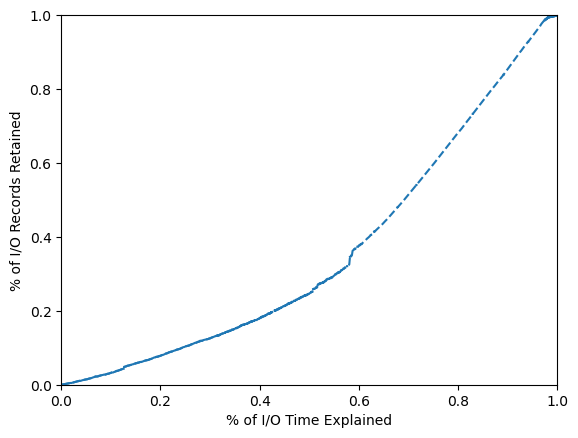

time: 620 ms (started: 2023-09-24 16:37:07 -07:00)


In [9]:
ax, _ = res.plot.slope(
    metric='duration',
    view_keys=[('time_range',)],
#     ax=ax,
    xlabel='% of I/O Time Explained',
    ylabel='% of I/O Records Retained',
#     color=f"C{i}"
)
ax

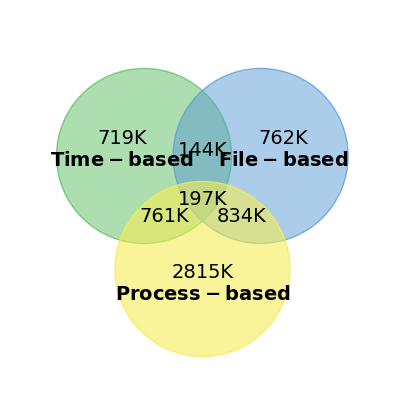

time: 33.1 s (started: 2023-09-24 16:52:47 -07:00)


In [20]:
fig, ax = res.plot.view_relations3(
    metric='duration',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
    label1='Time-based',
    label2='File-based',
    label3='Process-based'
)
ax.get_legend().remove()

In [10]:
bot_dur_tr_hl = res.bottlenecks['duration'][('time_range',)].high_level_view.compute()
bot_dur_tr_hl

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,bw,iops,intensity,id,att_perf,duration_norm,duration_pero,duration_perr,duration_score,duration_th
time_range,,,,,,,,,,,,,,,,,,,,,
15,1426.315778,612631,0,1048576,120833451672,5.190791,1426.293743,797.150136,54609711944,66223739728,...,8.471718e+07,242.474356,0.000005,-1544731062326401597,3.950107e+08,0.309815,0.309815,0.000960,medium,0.250
18,1118.439575,620329,0,1048576,122738743336,5.143115,1118.422455,616.627209,50865261584,71873481752,...,1.097411e+08,314.094751,0.000005,3010269242313157285,3.680926e+08,0.242940,0.242940,0.000753,low,0.100
22,1120.762634,577242,0,1048576,114207398368,5.214469,1099.355488,511.865030,47064108272,67143290096,...,1.019015e+08,291.614826,0.000005,-9128767989499344212,3.500748e+08,0.243444,0.243444,0.000754,low,0.100
29,1266.300095,369353,0,1048576,72299371072,5.520458,1246.218498,576.835000,59388751136,12910619936,...,5.709497e+07,163.472309,0.000005,-4619588108323644436,2.919216e+08,0.275057,0.275057,0.000852,medium,0.250
30,1171.039766,304121,0,1048576,59335625360,5.595964,1164.263871,509.391519,57756017992,1579607368,...,5.066918e+07,144.797816,0.000005,8787723540037275996,2.555487e+08,0.254365,0.254365,0.000788,medium,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,62.463624,2956,0,1048576,597697216,0.004684,54.880023,7.578917,4448,597692768,...,9.568725e+06,26.927672,0.000005,-8732110758020867353,1.783292e+07,0.013568,0.013568,0.000042,very low,0.010
3719,58.153074,4764,0,1048576,959461488,0.009027,39.994347,18.149700,7224,959454264,...,1.649890e+07,46.790304,0.000005,-7755391847051661968,1.890219e+07,0.012632,0.012632,0.000039,very low,0.010
3720,39.753263,1056,0,1048576,214961216,0.001827,35.811421,3.940015,1568,214959648,...,5.407385e+06,15.017635,0.000005,-8407845592230885029,1.044043e+07,0.008635,0.008635,0.000027,trivial,0.001


time: 44.5 s (started: 2023-09-24 16:38:12 -07:00)


In [25]:
bot_dur_tr_hl['duration_score'].value_counts()

low          685
medium       543
very low     204
high          21
trivial        3
critical       2
very high      1
Name: duration_score, dtype: int64

time: 4.33 ms (started: 2023-09-24 17:06:13 -07:00)


In [23]:
bot_dur_fn_hl = res.bottlenecks['duration'][('file_name',)].high_level_view.compute()
bot_dur_fn_hl

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,bw,iops,intensity,id,att_perf,duration_norm,duration_pero,duration_perr,duration_score,duration_th
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/.micro_scale_feedback.32.1.0.shfp.10280.1906227490,1.913177,127,0,16,960,0.000468,0.000602,1.912107,480,480,...,5.017833e+02,62.722908,0.132292,-891038655691717388,227944.274820,0.000003,0.000003,3.605109e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/.micro_scale_feedback.32.1.0.shfp.10298.1906227490,1.817574,127,0,16,960,0.000445,0.000593,1.816536,480,480,...,5.281766e+02,66.022073,0.132292,-7846247966508693953,236063.113916,0.000003,0.000003,3.424959e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/.micro_scale_feedback.32.1.0.shfp.104604.1906227490,2.940569,127,0,16,960,0.000464,0.000620,2.939485,480,480,...,3.264675e+02,40.808434,0.132292,-1060693095603311542,226063.463637,0.000004,0.000004,5.541083e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/.micro_scale_feedback.32.1.0.shfp.104605.1906227490,1.957509,127,0,16,960,0.000415,0.000551,1.956542,480,480,...,4.904193e+02,61.302409,0.132292,-3876246278067356462,253366.798945,0.000003,0.000003,3.688646e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/.micro_scale_feedback.32.1.0.shfp.104606.1906227490,1.630524,127,0,16,960,0.000408,0.000540,1.629576,480,480,...,5.887679e+02,73.595982,0.132292,6565894564372951788,258252.558281,0.000002,0.000002,3.072490e-07,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/ml_selection_patch_file989,1.633371,506,0,1048576,503316480,0.058405,0.013080,1.621477,125829120,377487360,...,3.081459e+08,293.870820,0.000001,-2436239789915841005,31061.278929,0.000002,0.000002,3.077855e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/ml_selection_patch_file99,1.386597,378,0,1048576,377487360,0.000000,0.026101,1.375161,0,377487360,...,2.722401e+08,259.628363,0.000001,8164997740154308580,23179.137345,0.000002,0.000002,2.612845e-07,none,0.0
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/ml_selection_patch_file991,2.217732,506,0,1048576,503316480,0.055907,0.015614,2.202118,125829120,377487360,...,2.269509e+08,216.437292,0.000001,631862116419756491,31511.118826,0.000003,0.000003,4.179001e-07,none,0.0


time: 49.7 s (started: 2023-09-24 17:04:03 -07:00)


In [24]:
bot_dur_fn_hl['duration_score'].value_counts()

none         817629
critical          4
high              1
very low          1
very high         1
Name: duration_score, dtype: int64

time: 84.5 ms (started: 2023-09-24 17:05:52 -07:00)


In [28]:
bot_dur_fn_hl[bot_dur_fn_hl['duration_th'] >= 0.5]

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,bw,iops,intensity,id,att_perf,duration_norm,duration_pero,duration_perr,duration_score,duration_th
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/macro_scale_snapshot.32.1,491845.876744,751616,0,1048576,773094113280,75.824550,474626.754495,17219.122249,386547056640,386547056640,...,1.571822e+06,1.499006,9.722180e-07,-6279822050647398812,43913.438596,0.726598,0.726598,0.092681,high,0.50
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/macro_scale_snapshot.32.2,631142.206323,751615,1048576,1048576,773093064704,71.321016,621554.858819,9587.347505,386546008064,386547056640,...,1.224911e+06,1.168166,9.722180e-07,5064012677465691236,83381.470505,0.932379,0.932379,0.118930,critical,0.90
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/macro_scale_snapshot.32.3,645284.905427,751616,0,1048576,773094113280,72.403848,638523.369744,6761.535683,386547056640,386547056640,...,1.198066e+06,1.142565,9.722180e-07,3238035493049450778,42890.589496,0.953272,0.953272,0.121595,critical,0.90
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/micro_scale_snapshot.32.1,676916.003897,374784,1048576,1048576,386547056640,0.000000,671016.168825,5899.835072,0,386547056640,...,5.710414e+05,0.544588,9.695689e-07,1612130052925210250,11325.641972,1.000000,1.000000,0.127555,critical,0.90
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/micro_scale_snapshot.32.2,598768.662100,374784,1048576,1048576,386547056640,0.000000,588240.804998,10527.857102,0,386547056640,...,6.455700e+05,0.615663,9.695689e-07,6858367957116620566,9940.572610,0.884554,0.884554,0.112829,very high,0.75
/p/gpfs1/iopp/temp/wemul_mummi_emulation.3246643/micro_scale_snapshot.32.3,614010.227336,374784,0,1048576,386547056640,0.000000,605040.238789,8969.988547,0,386547056640,...,6.295450e+05,0.600381,9.695689e-07,-2159707521535921328,918.800321,0.907070,0.907070,0.115701,critical,0.90


time: 26 ms (started: 2023-09-24 17:06:55 -07:00)


In [29]:
bot_dur_pn_hl = res.bottlenecks['duration'][('proc_name',)].high_level_view.compute()
bot_dur_pn_hl

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,bw,iops,intensity,id,att_perf,duration_norm,duration_pero,duration_perr,duration_score,duration_th
proc_name,,,,,,,,,,,,,,,,,,,,,
wemul#lassen736#108065#35184394687104,6.775705e+05,2867168,0,1048576,579833626624,17.026762,671027.986653,6.525531e+03,128857636864,450975989760,...,8.557539e+05,2.449788,0.000005,-1572755541337935634,1.156046e+10,0.327267,0.327267,0.152115,medium,0.25
wemul#lassen736#153912#35184394687104,5.992443e+05,2867168,0,1048576,579833626624,16.917232,588252.058764,1.097537e+04,128857636864,450975989760,...,9.676080e+05,2.769995,0.000005,-9023532150307759931,1.112598e+10,0.289436,0.289436,0.134530,medium,0.25
wemul#lassen736#22610#35184394687104,6.147226e+05,2867168,0,1048576,579833626624,17.239145,605052.995201,9.652335e+03,128857636864,450975989760,...,9.432444e+05,2.700249,0.000005,-7423447994577124667,1.097156e+10,0.296912,0.296912,0.138005,medium,0.25
wemul#lassen83#132846#35184394687104,2.070388e+06,346826752,0,1048576,66358261448704,13083.880751,639195.602685,1.418108e+06,65971208126464,387053322240,...,3.205113e+07,91.698101,0.000005,-2427568294286020259,2.515168e+11,1.000000,1.000000,0.464802,critical,0.90
wemul#lassen83#68024#35184394687104,4.924166e+05,18622464,0,1048576,386557149184,3.545232,474630.395908,1.778265e+04,7143424,386550005760,...,7.850206e+05,2.247983,0.000048,-6303713930977339144,9.985949e+09,0.237838,0.237838,0.110548,low,0.10


time: 30.9 s (started: 2023-09-24 17:07:25 -07:00)


In [30]:
bot_dur_pn_hl['duration_score'].value_counts()

medium      3
critical    1
low         1
Name: duration_score, dtype: int64

time: 5.25 ms (started: 2023-09-24 17:07:57 -07:00)


In [13]:
from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

rules = dict(
    # app_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # file_dir=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # file_regex=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # node_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # proc_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    # rank=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    time_range=[Rule.BOTT_METADATA_ACCESS],
)

rule_engine = RecorderRuleEngine(rules=rules)

rule_engine


time: 12 ms (started: 2023-09-24 16:40:41 -07:00)


In [14]:
%autoreload 2

characteristics = rule_engine.process_characteristics(view=res.main_view)
characteristics


{<Rule.CHAR_IO_TIME: 118>: RuleResult(data_dict=None, description='I/O Time', detail_list=['Read - 13083.88 seconds (0.63%)', 'Write - 671027.99 seconds (32.41%)', 'Metadata - 1418108.25 seconds (68.49%)'], reasons=None, rule=<Rule.CHAR_IO_TIME: 118>, value=2070387.7334559134, value_fmt='2070387.73 seconds'),
 <Rule.CHAR_IO_COUNT: 111>: RuleResult(data_dict=None, description='I/O Ops', detail_list=['Read - 266,622,106 ops (35.24%)', 'Write - 139,143,359 ops (18.39%)', 'Metadata - 350,793,822 ops (46.37%)'], reasons=None, rule=<Rule.CHAR_IO_COUNT: 111>, value=756559287, value_fmt='756,559,287 ops'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(data_dict=None, description='I/O Size', detail_list=['Read - 128281.05 GB (97.12%)', 'Write - 3802.10 GB (2.88%)'], reasons=None, rule=<Rule.CHAR_IO_SIZE: 116>, value=141823208064496, value_fmt='132083.16 GB'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(data_dict=None, description='Read Xfer', detail_list=['<4 KB - 2,491,382 ops (92.64%)', '256 KB-1 MB

time: 2min 25s (started: 2023-09-24 16:40:45 -07:00)


In [18]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in characteristics.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time        2070387.73 seconds                                                                             │
│                  ├── Read - 13083.88 seconds (0.63%)                                                            │
│                  ├── Write - 671027.99 seconds (32.41%)                                                         │
│                  └── Metadata - 1418108.25 seconds (68.49%)                                                     │
│  I/O Ops         756,559,287 ops                                                                                │
│                  ├── Read - 266,622,106 ops (35.24%)                                                            │
│                  ├── Write - 139,143,359 ops (18.39%)                                                           │
│                  └── Metadata - 350,793,822 ops (46.37%)                                                        │
│  I/O Size        132083.16 GB                                                                                   │
│                  ├── Read - 128281.05 GB (97.12%)                                                               │
│                  └── Write - 3802.10 GB (2.88%)                                                                 │
│  Read Xfer       4 KB-1 MB - 2,689,248 ops                                                                      │
│                  ├── <4 KB - 2,491,382 ops (92.64%)                                                             │
│                  └── 256 KB-1 MB - 197,866 ops (7.36%)                                                          │
│  Write Xfer      4 KB-1 MB - 2,512,680 ops                                                                      │
│                  ├── <4 KB - 2,491,302 ops (99.15%)                                                             │
│                  └── 256 KB-1 MB - 21,378 ops (0.85%)                                                           │
│  Apps            1 apps                                                                                         │
│                  └── wemul - 2070387.73 s (100.00%) - 128281.05/3802.10 GB R/W (97.12/2.88%) - 756,559,287 ops  │
│                      (100.00%)                                                                                  │
│  Nodes           2 nodes                                                                                        │
│                  ├── lassen83 - 2070387.73 s (100.00%) - 127561.01/2182.08 GB R/W (96.58/1.65%) - 744,077,847   │
│                  │   ops (98.35%)                                                                               │
│                  └── lassen736 - 677570.54 s (32.73%) - 720.04/1620.02 GB R/W (0.55/1.23%) - 12,481,440 ops     │
│                      (1.65%)                                                                                    │
│  Files           2243771 files                                                                                  │
│                  ├── Shared: 2243771 files (100.00%)                                                            │
│                  └── FPP: 0 files (0.00%)                                                                       │
│  Access Pattern  100.00% Sequential - 0.00% Random                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

time: 145 ms (started: 2023-09-24 16:44:07 -07:00)
